In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

**Loading the data and initial exploration**

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The data is categorial so I convert it with LabelEncoder to transfer to ordinal.

In [5]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


From the table above it can be seen that the column "veil-type" is 0 and not contributing to the data so I remove it.

In [7]:
df = df.drop(["veil-type"],axis=1)

**Quick look at the characteristics of the data**

The violin plot below represents the distribution of the classification characteristics. It is possible to see that "gill-color" property of the mushroom breaks to two parts, one below 3 and one above 3, that may contribute to the classification. 

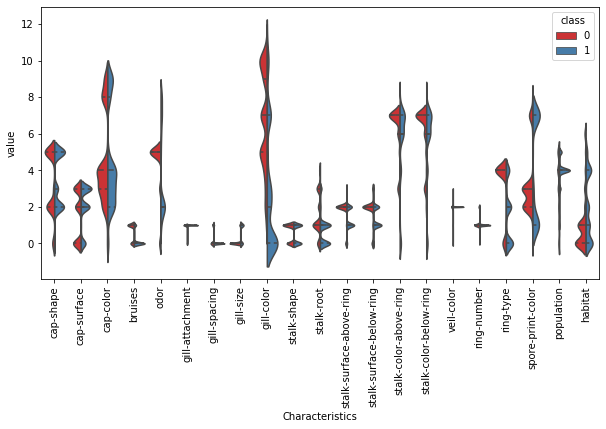

In [8]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

**Is the data balanced?**

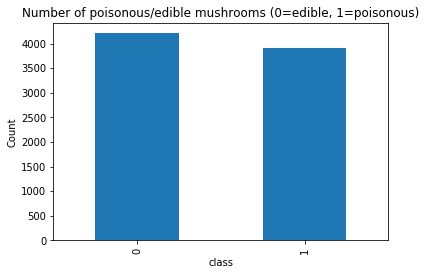

In [9]:
plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');

The dataset is almost balanced

Let's look at the correlation between the variables:

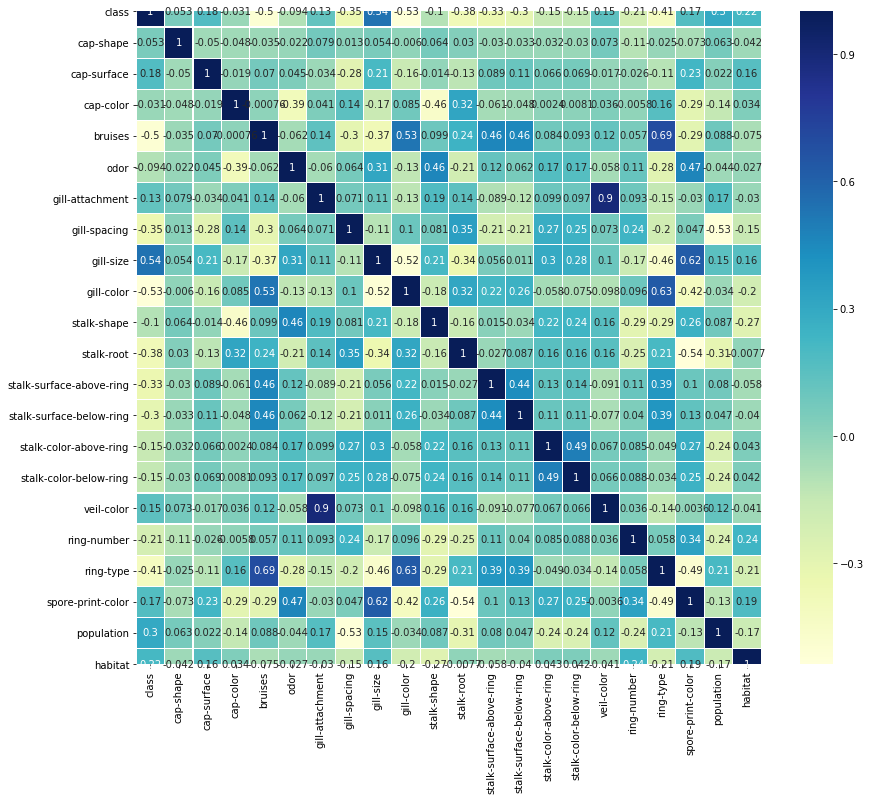

In [10]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

Usually the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53 so let's look at it closely:

In [11]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


Lets look closely at the feature "gill-color" :

/home/spknnk/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/spknnk/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


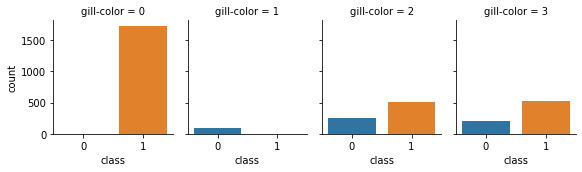

In [12]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

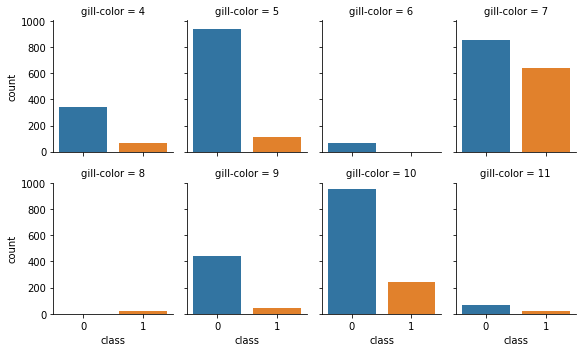

In [13]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]

sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

In [14]:
X = df.drop(['class'], axis=1)
y = df['class']

# Lab 2

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from ml_algos import *

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [16]:
def cv(model, X, y, k_folds=5):
    kf = KFold(n_splits=k_folds, random_state=16, shuffle=True)
    scores = np.zeros(k_folds)    
    for i, (train_index, val_index) in enumerate(kf.split(X, y)):
        X_train, y_train = X.loc[train_index].to_numpy(), y.loc[train_index].to_numpy()
        X_val, y_val = X.loc[val_index].to_numpy(), y.loc[val_index].to_numpy()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        scores[i] = accuracy_score(y_val, y_pred)
    return scores

In [17]:
%%time
model = LogisticRegression()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.9497781735505872
CPU times: user 755 ms, sys: 476 ms, total: 1.23 s
Wall time: 361 ms


In [18]:
%%time
model = LR()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.9164206138688897
CPU times: user 14.8 s, sys: 8.17 s, total: 23 s
Wall time: 5.94 s


In [19]:
%%time
model = KNeighborsClassifier(n_neighbors=5)
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.9987690791966652
CPU times: user 633 ms, sys: 64.2 ms, total: 697 ms
Wall time: 544 ms


In [20]:
%%time
model = KNN(nn=5)
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.9986459264873059
CPU times: user 3.67 s, sys: 211 ms, total: 3.88 s
Wall time: 3.88 s


In [21]:
%%time
model = DecisionTreeClassifier(max_depth=3)
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.9586414550966275
CPU times: user 42.9 ms, sys: 0 ns, total: 42.9 ms
Wall time: 42.3 ms


In [22]:
%%time
model = DTC()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.7902507010231148
CPU times: user 3.61 s, sys: 0 ns, total: 3.61 s
Wall time: 3.61 s


In [23]:
%%time
model = RandomForestClassifier()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  1.0
CPU times: user 147 ms, sys: 1.65 ms, total: 148 ms
Wall time: 150 ms


In [25]:
%%time
model = RFC()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.500001439939371
CPU times: user 9.52 s, sys: 13.5 ms, total: 9.53 s
Wall time: 9.53 s
